In [1]:
%matplotlib inline
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from analyser import *

## Import all accepted submissions for a specifc course

In [2]:
subs = import_submissions(course_id = "C00198", dbname="test1")

In [3]:
subs = subs[subs.veredict == 'AC']
subs.describe()

,submission_uid,user_id,problem_id,submission_id,state,time_out,time_in,veredict,score
count,9344,9344,9344,9344,9344,9344,9344,9344,0.0
unique,9344,72,203,29,1,9295,9299,1,0.0
top,S001457382,U00214,P68688,S001,done,2015-09-15 14:05:09,2015-10-27 11:35:56,AC,NaN
freq,1,281,84,5470,9344,2,2,9344,NaN
first,NaN,NaN,NaN,NaN,NaN,2010-09-15 15:37:19,2010-09-15 10:45:10,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2016-02-23 21:39:42,2016-02-23 21:39:33,NaN,NaN


In [4]:
subs.head()

,submission_uid,user_id,problem_id,submission_id,state,time_out,time_in,veredict,score
4,S000478753,U00214,P25992,S001,done,2011-05-18 08:36:56,2011-05-18 08:36:47,AC,None
10,S000469578,U00214,P26374,S001,done,2011-04-25 19:27:43,2011-04-24 10:51:12,AC,None
11,S000469579,U00214,P26374,S002,done,2011-04-25 19:27:43,2011-04-24 11:12:05,AC,None
13,S000377755,U00214,P89979,S001,done,2014-02-24 21:32:03,2010-11-10 09:14:15,AC,None
17,S000464028,U00214,P20262,S001,done,2011-04-07 08:26:39,2011-04-07 08:26:33,AC,None


In [5]:
subs = subs.sort_values(by='time_out')

## Generate each users sequence

In [6]:
# Users list
users = subs.user_id.unique()
print "%d Users" % len(users)

72 Users


In [7]:
# Users pbls
pbls = subs.problem_id.unique()
print "%d resolved problems" % len(pbls)

203 resolved problems


In [8]:
# Longuest sequence
seqsize = subs.user_id.value_counts(normalize=False)[0]
print ("the longuest sequence is %d accepted submissions long" % seqsize )

the longuest sequence is 281 accepted submissions long


In [9]:
sequences = pd.DataFrame(index=range(seqsize), columns=users)

In [10]:
ex = subs[subs.user_id == "U00214"].problem_id

In [11]:
len(ex)

281

In [12]:
ex.value_counts().describe()

count    179.000000
mean       1.569832
std        1.184822
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       10.000000
Name: problem_id, dtype: float64

In [13]:
df = pd.DataFrame()
for u in users:
    df[u] = pd.Series(subs[subs.user_id == u].problem_id.values)

In [14]:
df.describe()

,U00214,U12942,U12971,U14903,U14913,U14908,U14949,U14881,U14989,U15243,...,U16372,U15971,U16404,U16377,U16072,U16409,U16288,U16609,U16688,U16564
count,281,178,180,115,195,204,162,105,68,170,...,155,181,26,43,175,176,19,100,1,14
unique,179,166,168,112,168,180,137,101,67,157,...,146,175,23,41,174,166,19,96,1,14
top,P68688,P41221,P20006,P27411,P60816,P57852,P26374,P77686,P76024,P39225,...,P96965,P24301,P69277,P73501,P99555,P39308,P68688,P67723,P68688,P68688
freq,10,3,3,2,4,3,3,3,2,3,...,2,2,2,2,2,2,1,2,1,1


In [15]:
df.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
count,72,70,69,69,69,69,69,69,69,69,...,1,1,1,1,1,1,1,1,1,1
unique,8,11,11,14,15,15,18,18,20,20,...,1,1,1,1,1,1,1,1,1,1
top,P68688,P57548,P41221,P56118,P52847,P90615,P15613,P48107,P37469,P34279,...,P73039,P89124,P41412,P46584,P46584,P16072,P70093,P95520,P63888,P87679
freq,60,54,55,52,50,39,30,32,28,14,...,1,1,1,1,1,1,1,1,1,1


## Analyse a typical sequence

In [16]:
seq = df.head(n=20)

In [17]:
seq.T.describe().T

,count,unique,top,freq
0,72,8,P68688,60
1,70,11,P57548,54
2,69,11,P41221,55
3,69,14,P56118,52
4,69,15,P52847,50
5,69,15,P90615,39
6,69,18,P15613,30
7,69,18,P48107,32
8,69,20,P37469,28
9,69,20,P34279,14


## sequence size vs number of users

<IPython.core.display.Javascript object>


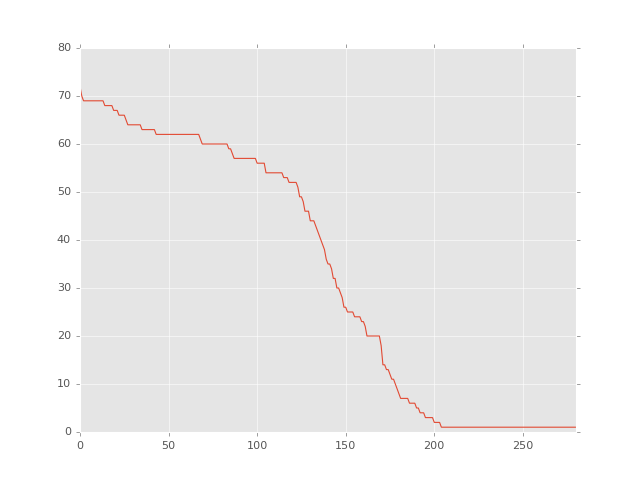

In [18]:
df.T.describe().T["count"].plot()

## How many differents for each level ?

<IPython.core.display.Javascript object>


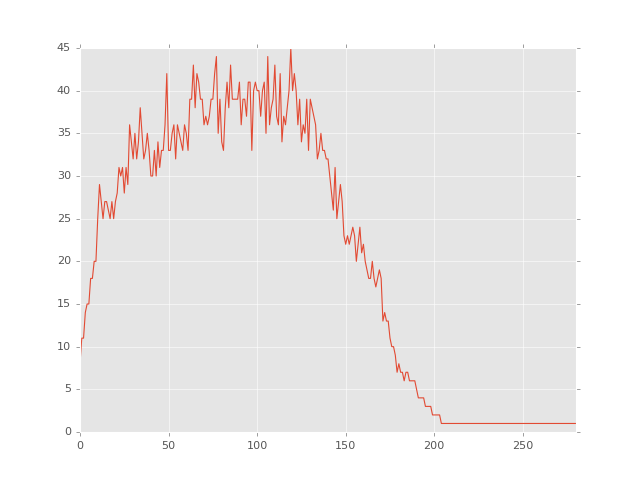

In [19]:
plt.figure()
df.T.describe().T["unique"].plot()

## How many differents for each level ? --> unique/total correlation 

In [20]:
# df.T.describe().T

<IPython.core.display.Javascript object>


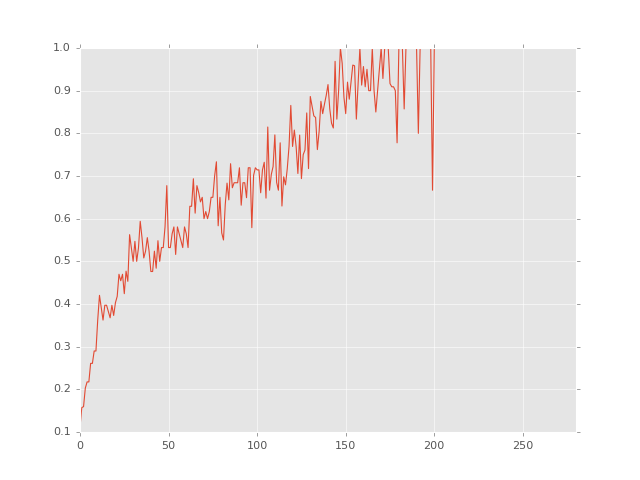

In [21]:
plt.figure()
(df.T.describe().T["unique"] / df.T.describe().T["count"]).plot()

<IPython.core.display.Javascript object>


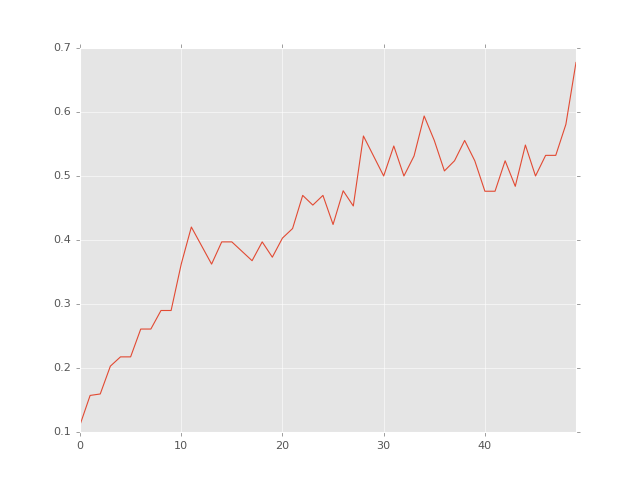

In [22]:
plt.figure()
s = df.head(n=50)
(s.T.describe().T["unique"] / s.T.describe().T["count"]).plot()

In [23]:
df.head()

,U00214,U12942,U12971,U14903,U14913,U14908,U14949,U14881,U14989,U15243,...,U16372,U15971,U16404,U16377,U16072,U16409,U16288,U16609,U16688,U16564
0,P68688,P52847,P90615,P57548,P57548,P57548,P57548,P65437,P39225,P68688,...,P68688,P68688,P68688,P68688,P68688,P68688,P68688,P68688,P68688,P42280
1,P52847,P57548,P68688,P41221,P68688,P68688,P56118,P22654,P68688,P57548,...,P57548,P57548,P57548,P57548,P57548,P57548,P57548,P57548,NaN,P37500
2,P90615,P41221,P57548,P79817,P41221,P41221,P97156,P88790,P57548,P41221,...,P56118,P41221,P41221,P41221,P41221,P41221,P41221,P41221,NaN,P68688
3,P51126,P41221,P41221,P33839,P59539,P56118,P31170,P55722,P41221,P56118,...,P81629,P56118,P56118,P56118,P56118,P56118,P56118,P56118,NaN,P57548
4,P56559,P56118,P56118,P80660,P37469,P52847,P50327,P58153,P52847,P61634,...,P37500,P67723,P52847,P59539,P52847,P52847,P52847,P52847,NaN,P41221


## Step 0

In [24]:
p = df.T[0].value_counts()
p

P68688    60
P57548     6
P39225     1
P84735     1
P52847     1
P90615     1
P42280     1
P65437     1
Name: 0, dtype: int64

In [25]:
s = p.sum()
steps = []
steps.append(p.apply(lambda x : float(x) / s))
steps

[P68688    0.833333
 P57548    0.083333
 P39225    0.013889
 P84735    0.013889
 P52847    0.013889
 P90615    0.013889
 P42280    0.013889
 P65437    0.013889
 Name: 0, dtype: float64]

### 83% of the users start with the *hello world* program
```
test1=# select * from problems where problem_nm like 'P68688';
 problem_id | problem_nm | language_id |       title       | original_language_id | checked 
------------+------------+-------------+-------------------+----------------------+---------
 P68688_en  | P68688     | en          | Hello world!      | ca                   |       1
 P68688_es  | P68688     | es          | Hola a todos!     | ca                   |       1
 P68688_ca  | P68688     | ca          | Bon dia a tothom! | ca                   |       1
(3 rows)

```

## Step 1

In [26]:
p = df.T[1].value_counts()
p

P57548    54
P68688     5
P41221     3
P39057     1
P63414     1
P52847     1
P67723     1
P37469     1
P56118     1
P22654     1
P37500     1
Name: 1, dtype: int64

In [27]:
s = p.sum()
steps.append(p.apply(lambda x : float(x) / s))
print( "%.2f%% of the users start with the %s program"  % (steps[-1][0], p.index[0]))

0.77% of the users start with the P57548 program


```
test1=# select * from problems where problem_nm like 'P57548';
 problem_id | problem_nm | language_id |           title            | original_language_id | checked 
------------+------------+-------------+----------------------------+----------------------+---------
 P57548_ca  | P57548     | ca          | Suma de dos enters         | ca                   |       1
 P57548_en  | P57548     | en          | Sum of two integer numbers | ca                   |       1
(2 rows)
```

In [28]:
## Step 2
p = df.T[2].value_counts()
print p
s = p.sum()
steps.append(p.apply(lambda x : float(x) / s))
print( "%.2f%% of the users start with the %s program"  % (steps[-1][0], p.index[0]))

P41221    55
P57548     3
P56118     3
P90615     1
P97156     1
P79817     1
P85288     1
P59539     1
P59875     1
P68688     1
P88790     1
Name: 2, dtype: int64
0.80% of the users start with the P41221 program


In [29]:
## Step 3
p = df.T[3].value_counts()
print p
s = p.sum()
steps.append(p.apply(lambda x : float(x) / s))
print( "%.2f%% of the users start with the %s program"  % (steps[-1][0], p.index[0]))

P56118    52
P41221     4
P59539     2
P55722     1
P69277     1
P61634     1
P57548     1
P81629     1
P72986     1
P90615     1
P33839     1
P51126     1
P38045     1
P31170     1
Name: 3, dtype: int64
0.75% of the users start with the P56118 program


In [30]:
## Step 4
p = df.T[4].value_counts()
print p
s = p.sum()
steps.append(p.apply(lambda x : float(x) / s))
print( "%.2f%% of the users start with the %s program"  % (steps[-1][0], p.index[0]))

P52847    50
P56118     5
P59539     2
P31618     1
P57474     1
P50327     1
P61634     1
P56559     1
P58153     1
P37469     1
P67723     1
P29973     1
P80660     1
P37500     1
P41221     1
Name: 4, dtype: int64
0.72% of the users start with the P52847 program


## Let's iterate for the whole process

In [31]:
steps = []
pbls = []
for i in df.T:
    p = df.T[i].value_counts()
    pbls.append(p.index[0])
    s = p.sum()
    steps.append(p.apply(lambda x : float(x) / s))
    

In [32]:
df2 = pd.DataFrame(steps)

## Typical evolution

In [33]:
#df2.T[0]

### Typical evolution confidence

<IPython.core.display.Javascript object>


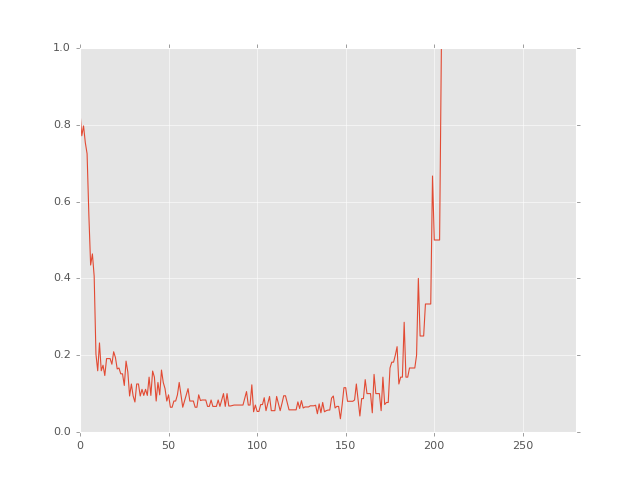

In [34]:
plt.figure()
evol = pd.Series([s[0] for s in steps])
evol.plot()

In [35]:
len([s[1] if len(s) > 1 else 0 for s in steps])

281

In [36]:
len([s[0] if len(s) > 1 else 0 for s in steps])

281

<IPython.core.display.Javascript object>


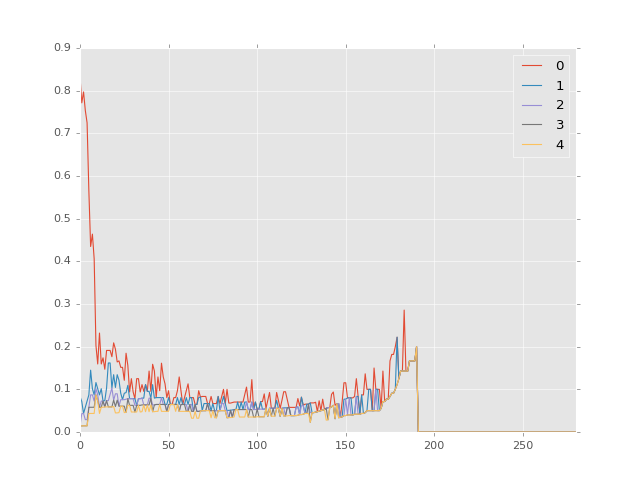

In [39]:
posi = 0
posj = 5

evol = pd.DataFrame([[s[i] if len(s) > posj-1 else 0 for s in steps] for i in range(posi, posj)], 
                    index=range(posi, posj))
evol.T.plot()